In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from urllib.request import urlopen
import json
from credentials import *
from entsoe import EntsoePandasClient
from entsoe.mappings import lookup_area
from pycaret.time_series import *
import logging

mpl.rcParams['figure.dpi'] = 150
logging.disable(logging.CRITICAL)


### Loading Dataset

In [2]:
# Get energy data from ENTSO-E API
country_code = 'ES'
area = lookup_area(country_code)

client = EntsoePandasClient(api_key=get_token())
end = pd.Timestamp.now(tz=area.tz) # - pd.DateOffset(days=10)
start = end - pd.DateOffset(weeks = 1)
%time df_energy = client.query_generation(area, start=start,end=end, nett = True, psr_type=None)
df_energy.set_index(df_energy.index.tz_convert(None), inplace = True)
df_energy = df_energy.resample('H').mean()

Wall time: 6.11 s


### Forecasting with PyCaret

In [3]:
ts = setup(data = df_energy['Solar'], fh = 24,
           enforce_exogenous = False, fold = 3)
           

,Description,Value
0,session_id,2424
1,Target,Solar
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(168, 1)"
5,Transformed data shape,"(168, 1)"
6,Transformed train set shape,"(144, 1)"
7,Transformed test set shape,"(24, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [36]:
model = create_model('exp_smooth', cross_validation = False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.6250,0.5625,267.7338,376.4700,0.0627,0.0641,0.9941


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

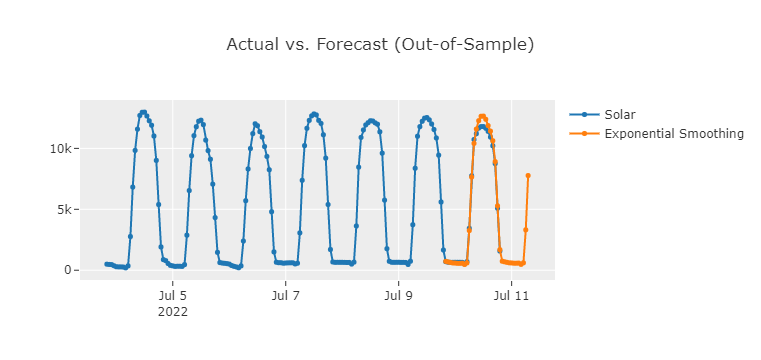

In [50]:
fig_kwargs = {'renderer': 'jupyterlab'}

plot_model(model, 'forecast', fig_kwargs = fig_kwargs, data_kwargs = {'fh': 36 })